In [1]:
import numpy as np
from tensorflow.keras import layers,regularizers,models
import matplotlib.pyplot as plt
import os

In [2]:
def build_fc_model(input_shape=(181,1), num_class=8):
    
    
    model = models.Sequential([
                                    layers.Conv1D(128,3,input_shape=input_shape,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.2),
                                    
                                    layers.Conv1D(64,3,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.2),
                                    
                                    # layers.Conv1D(64,3,activation='relu'),
                                    # layers.MaxPool1D(2),
                                    # layers.Dropout(0.2),
                                    
                                    # layers.Conv1D(32,3,activation='relu'),
                                    # layers.MaxPool1D(2),
                                    # layers.Dropout(0.1),
                                    
                                    # layers.Conv1D(32,3,activation='relu'),
                                    # layers.MaxPool1D(2),
                                    # layers.Dropout(0.2),

                                    layers.Flatten(),
                                    layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(2e-4)),
                                    layers.Dropout(0.1),

                                    layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(3e-8)),
                                    # layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0e-4)),
                                    # layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0e-4)),
                                    layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [3]:
def load_features(feature_path):
    x = []
    y = []
    for feature in os.listdir(feature_path):
        feat = np.loadtxt(feature_path+feature,delimiter=',')
        x.append(feat)
        label = feature[-7]
        y.append(int(label))
    x = np.array(x)
    y = np.array(y)
    h,w = x.shape
    x = x.reshape(h,w,1)
    h = y.shape[0]
    y = y.reshape(h,1)
    return (x,y)

# Loading features

In [4]:
x_train,y_train = load_features('features/train/')
x_test,y_test = load_features('features/test/')
print((x_train.shape,y_test.shape))

((1152, 30, 1), (288, 1))


# Training the model
The model classifies human voices in 8 different classes of emotions

**label**   **emotion**

0   =   neutral

1   =   calm

2   =   happy

3   =   sad

4   =   angry

5   =   fearful

6   =   disgust

7   =   surprised

In [8]:
model=build_fc_model(x_train[0].shape)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# csv_logger = CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(x_train,y_train,epochs=400,batch_size=256,validation_data=(x_test,y_test))

===========================] - 0s 16ms/step - loss: 0.1092 - accuracy: 0.9844 - val_loss: 0.9664 - val_accuracy: 0.7639
Epoch 261/400
5/5 [==============================] - 0s 17ms/step - loss: 0.1045 - accuracy: 0.9887 - val_loss: 0.9714 - val_accuracy: 0.7847
Epoch 262/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0968 - accuracy: 0.9878 - val_loss: 1.0244 - val_accuracy: 0.7882
Epoch 263/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0982 - accuracy: 0.9878 - val_loss: 0.9915 - val_accuracy: 0.7708
Epoch 264/400
5/5 [==============================] - 0s 19ms/step - loss: 0.1132 - accuracy: 0.9852 - val_loss: 0.9842 - val_accuracy: 0.7639
Epoch 265/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0958 - accuracy: 0.9905 - val_loss: 0.9896 - val_accuracy: 0.7604
Epoch 266/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0995 - accuracy: 0.9878 - val_loss: 1.0081 - val_accuracy: 0.7569
Epoch 267/400
5/5 [=========

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 128)           512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            24640     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)              

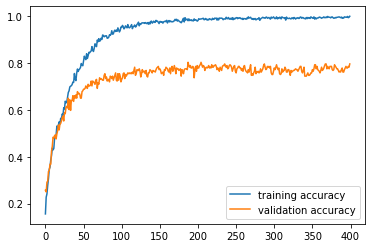

In [10]:
plt.plot(history.history['accuracy'],label = 'training accuracy')
# print(history.history.keys())
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()